[![Le Baladin](https://img.shields.io/badge/Le_baladin-Spectres_avec_le_SA200_dans_la_région_de_Messier_52-blue.svg)](https://sites.google.com/view/astronomie-ut1/accueil)

_Dominique Touzan_<sup>1,2</sup>

<sup>1</sup>Notebook: https://github.com/dtouzan/Jupyter/blob/master/Spectres_region_M52.ipynb

<sup>2</sup>Correspondance: [dtouzan@gmail.com](mailto:dtouzan@gmail.com).

Édition   1.0, révision 01/12/2021 - 01/01/2022.

---
**Résumé** : Début automne les observations ont commencé avec le SA200. L'utilisation de celui ci est facile à mettre en oeuvre et donne des résultat pour le moment me satisfaisant. Les nuit durant lesquelles les images ont été prise pour les premiers spectres n'étaient pas exempt de lune , nuage et brume de plus pour certaines prises le filtre 'L' du porte filtre n'a pas été enlevé (ça coupe bien la lumière). Donc seulement deux soirées ont été retenues pour les données celles du 22 novembre et du 23 novembre 2021. Les instruments ont bien fonctionné tout de même et le suivi de l'étoile variable **v1405 Cas** me fourni une descente de magnitude 7 à 9. Un petit module python a été créé pour utiliser le module **Specutils** et afficher facilement les spectres obtenus.

**Observations** : Le montage optique effectué est assez simple à construire, un objectif photographique de 60 mm de diamètre et d'une focale de 85 mm celui ci est ouvert à F/D 6 au lieu de F/D 1.4 ce qui réduit malheureusement considérablement la luminosité mais améliore l'image. Le porte filtre EFWmini qui n'est pas utilisé dans la configuration spectrographe mais seulement prise d'image grand champ. La caméra ASI 178MM et le SA200 installé un peu avant la CMOS environ à 12 mm de celle ci. Les images ont été prises en binning 1 (_fig 1.0._ en binning 2) avec un temps de pose de 120 secondes. Un empilement médian est effectué pour avoir une image relativement correcte et pas trop bruitée, une rotation de 9° sur l'image finale est nécessaire pour remettre les spectres à l'horizontal (la rotation du SA200 n'est pas facilement contrôlable).


_Mots-clés_ : `SA200` - `Spectre` - `Optique` - `specutils`

---
[![astropy](http://img.shields.io/badge/powered%20by-AstroPy-orange.svg?style=flat)](http://www.astropy.org/) [![specutils](http://img.shields.io/badge/powered%20by-Specutils-orange.svg?style=flat)](https://specutils.readthedocs.io/en/stable/#) [![cds](http://img.shields.io/badge/CDS-Database-green.svg?style=flat)](http://cdsportal.u-strasbg.fr/) [![aavso](http://img.shields.io/badge/AAVSO-Database-green.svg?style=flat)](https://www.aavso.org/databases)

---
![preview](https://github.com/dtouzan/preview/blob/main/20211123-plan.png?raw=true)

>**_Fig 1.0._** Observation du 23 Novembre 2021 19h 05mn TU, temps de pose 120 secondes. Samyang 85mm F6, Porte filtre ZWO EFWmini, SA200, cmos ZWO ASI 178MM.

- Importation des modules matplotlib et sa200

In [1]:
import warnings
from matplotlib import pyplot as plt
from ciboulette.spectrum import sa200
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

>**_Note_ :** Les `warnings` sont des défauts de lecture de l'entête FITS concernant le champs `DATE-OBS`

- Lecture des profiles créés et des références ISIS 6.1.1 et création de la bibliothèque

In [2]:
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)
dataset = ('dataset/dbspectre/Pn_4cas-20211123.fits',
           'dataset/dbspectre/Pn_HD221671-20211123.fits',
           'dataset/dbspectre/Pn_HD221263-20211123.fits',
           'dataset/dbspectre/Pn_HD240375-20211123.fits',
           'dataset/dbspectre/Pn_HD222685-20211123.fits',
           'dataset/dbspectre/Pn_PZCas-20211123.fits',
           'dataset/dbspectre/Pn_HD222275-20211123.fits',
           'dataset/dbspectre/Pn_HD221393-20211123.fits',
           'dataset/dbspectre/Pn_HD220369-20211123.fits',
           'dataset/dbspectre/Pn_HD221038-20211123.fits',
           'dataset/dbspectre/Pn_HD221143-20211123.fits',
           'dataset/dbspectre/Pn_HD221392-20211123.fits',
           'dataset/dbspectre/Pn_HD221334-20211123.fits',
           'dataset/dbspectre/Pn_HD220074-20211123.fits')

table_sa200 = []
for file in dataset:
    table_sa200.append(sa200.SA200(file))

K3II = sa200.SA200('dataset/dbspectre/ref-K3I.fits')
K3I = sa200.SA200('dataset/dbspectre/ref-K3I.fits')
M0III = sa200.SA200('dataset/dbspectre/ref-M0III.fits')
M1III = sa200.SA200('dataset/dbspectre/ref-M1III.fits')
M2I = sa200.SA200('dataset/dbspectre/ref-M2I.fits')
A0I = sa200.SA200('dataset/dbspectre/ref-A0I.fits')
K2III = sa200.SA200('dataset/dbspectre/ref-K2III.fits')
M3Ia = sa200.SA200('dataset/dbspectre/ref-M3Ia.fits')
A3III = sa200.SA200('dataset/dbspectre/ref-A3III.fits')
K5III = sa200.SA200('dataset/dbspectre/ref-K5III.fits')
A7III = sa200.SA200('dataset/dbspectre/ref-A7III.fits')
A2V = sa200.SA200('dataset/dbspectre/ref-A2V.fits')
K0III = sa200.SA200('dataset/dbspectre/ref-k0III.fits')
M2III = sa200.SA200('dataset/dbspectre/ref-M2III.fits')

>**_Note_ :** Les fichiers sont [ici.](https://drive.google.com/drive/folders/1vB4VsLEAP8Jh2qYspy3vRUTOjJ1kNKfP?usp=sharing) Leurs noms sont "Pn_NOM-DATE.fits"

- <a name="spectrum1"></a>Edition des Spectres.

Pour la réalisation de leur profil l'image médian du champ d'étoiles est découpée pour chaque étoile. Sous Isis le choix de l'instrument est "Star Analyser". Le calibrage de la dispersion, la réponse instrumentale si même pour ces exemples la PLU n'est pas enlevée et la division du profil étalonné par la reponse spectrale sont bien documentés dans les exemples de la documentation.

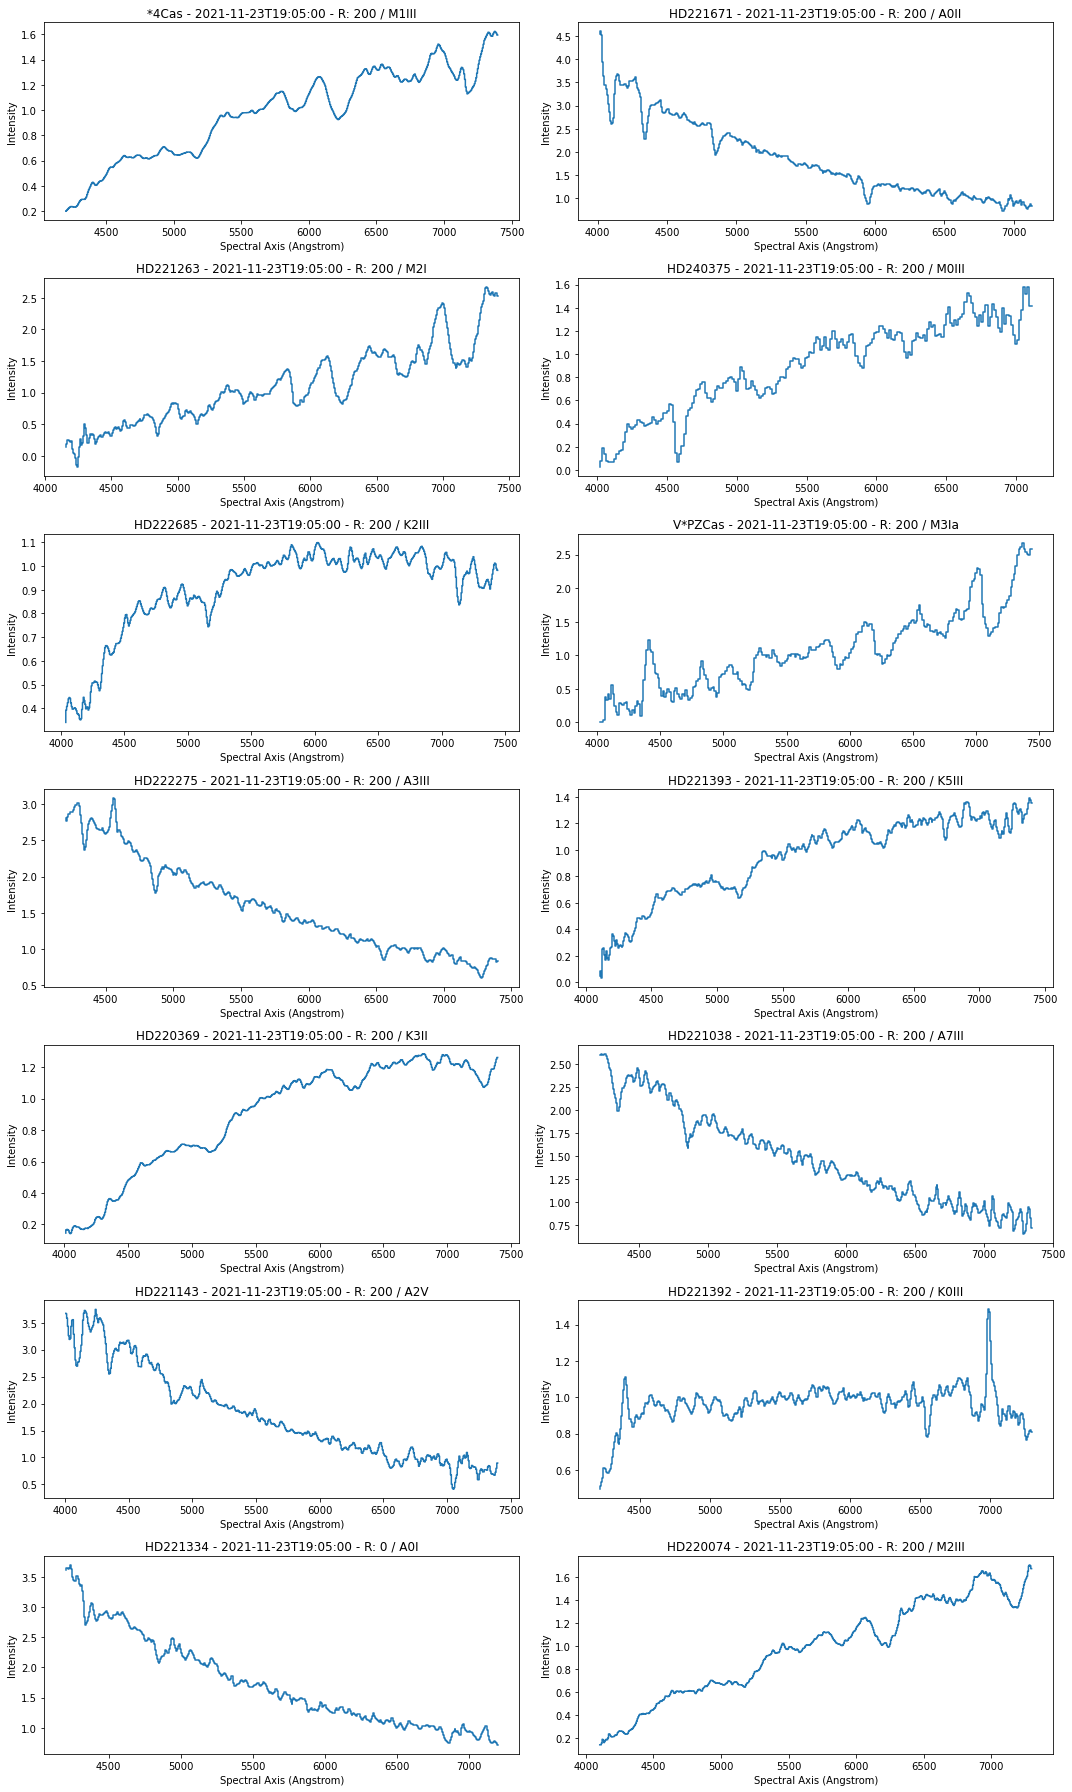

In [3]:
nrows = 7
ncols = 2
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 25))

nrow = 0
ncol = 0
for S in table_sa200:
    axs[ncol, nrow].set_title(S.title)
    axs[ncol, nrow].step(S.s1d.spectral_axis, S.s1d.flux)
    axs[ncol, nrow].set_xlabel('Spectral Axis ({})'.format(S.s1d.spectral_axis.unit)) 
    axs[ncol, nrow].set_ylabel('Intensity'.format(S.s1d.flux.unit))
    nrow +=1
    if nrow == 2:
        ncol += 1
        nrow = 0
    
fig.tight_layout()
plt.show()

>**_Fig 2.0._** Certaines raies ne sont que des étoiles à l'ordre 0 surtout au début et à la fin du spectre de `HD 221392`.

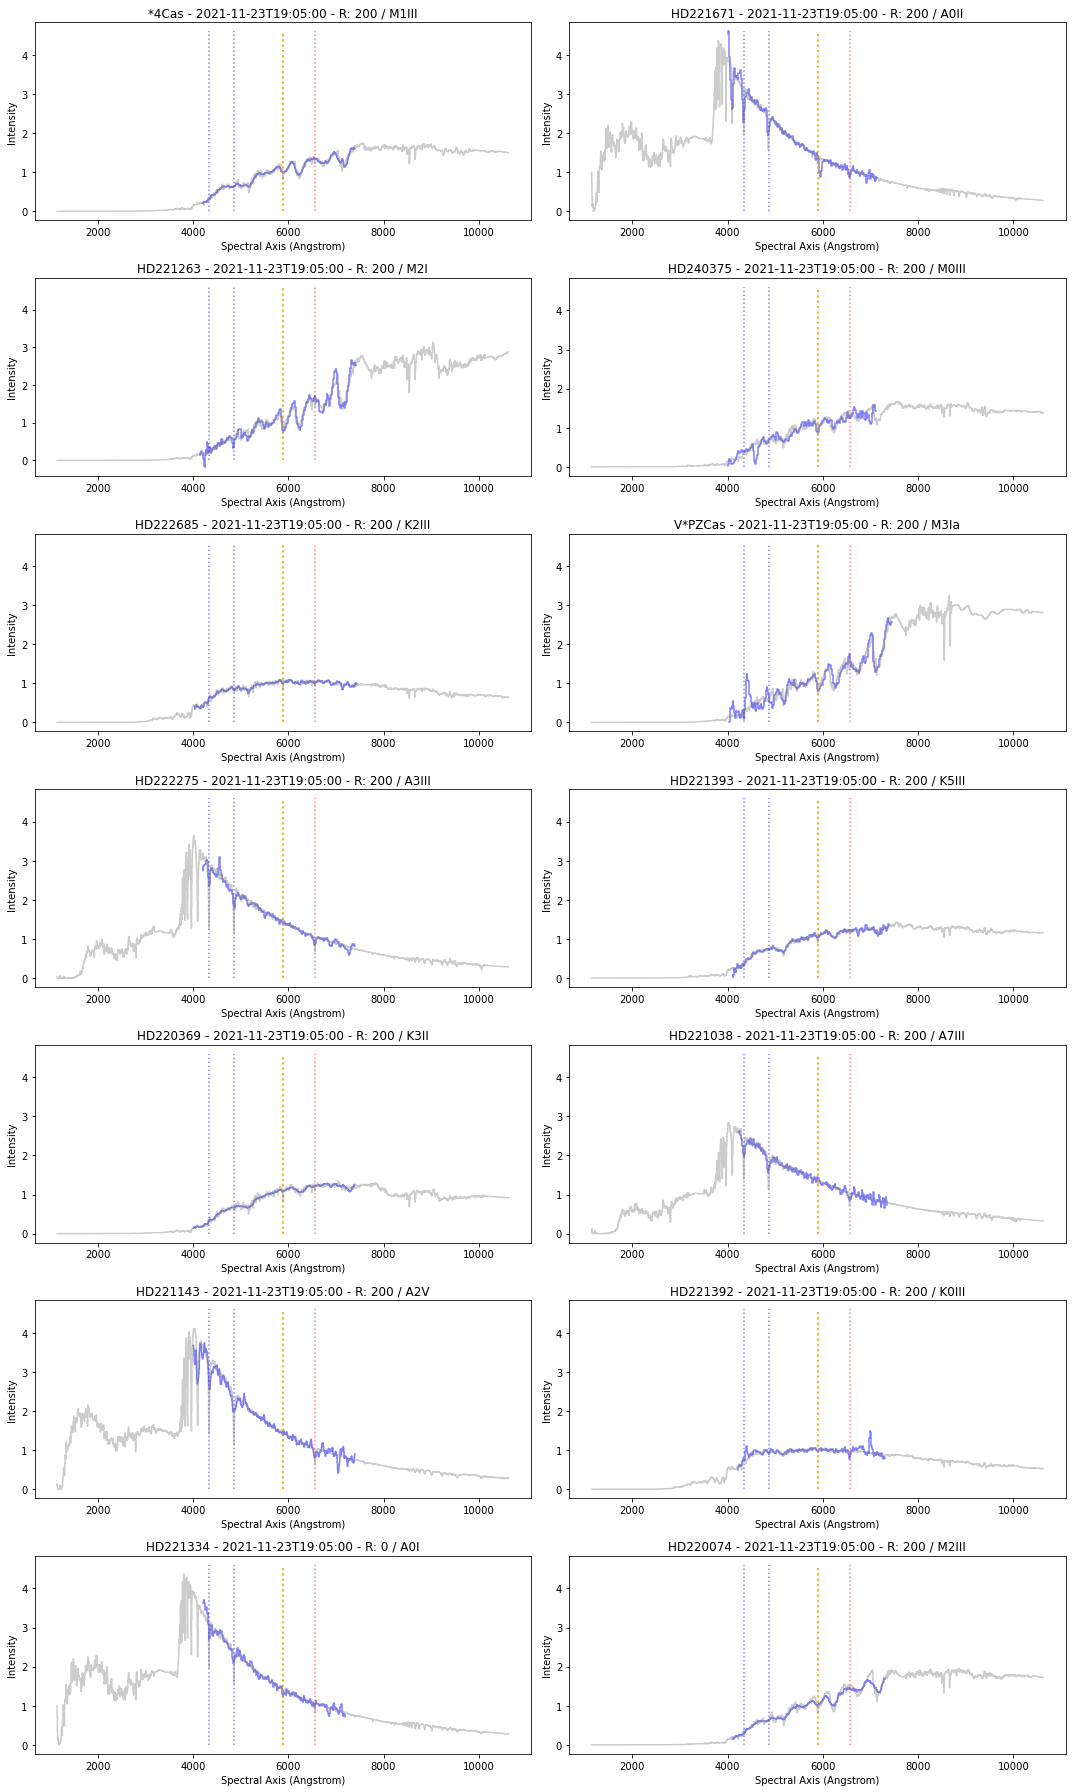

In [4]:
#Serie de balmer
Ha = 6562.10
Hb = 4861.32
Hg = 4340.46
# Doublet du sodium
NaID1 = 5895.924 
NaID2 = 5889.950 


nrows = 7
ncols = 2
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 25)) 

nrow = 0
ncol = 0
for S in table_sa200:
    axs[ncol, nrow].set_title(S.title)
    axs[ncol, nrow].step(S.s1d.spectral_axis, S.s1d.flux, color = 'blue', alpha = 0.5)
    axs[ncol, nrow].vlines(Ha, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'red', alpha = 0.5)
    axs[ncol, nrow].vlines(Hb, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'blue', alpha = 0.5)
    axs[ncol, nrow].vlines(Hg, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'blue', alpha = 0.5)
    axs[ncol, nrow].vlines(NaID1, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'orange', linewidth=2, alpha = 0.7)
    axs[ncol, nrow].vlines(NaID2, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'orange', linewidth=2, alpha = 0.7)
    axs[ncol, nrow].set_xlabel('Spectral Axis ({})'.format(S.s1d.spectral_axis.unit)) 
    axs[ncol, nrow].set_ylabel('Intensity'.format(S.s1d.flux.unit))
    nrow +=1
    if nrow == 2:
        ncol += 1
        nrow = 0
        
axs[0, 0].step(M1III.s1d.spectral_axis, M1III.s1d.flux, color = 'grey', alpha = 0.4)
axs[0, 1].step(A0I.s1d.spectral_axis, A0I.s1d.flux, color = 'grey', alpha = 0.4)
axs[1, 0].step(M2I.s1d.spectral_axis, M2I.s1d.flux, color = 'grey', alpha = 0.4)
axs[1, 1].step(M0III.s1d.spectral_axis, M0III.s1d.flux, color = 'grey', alpha = 0.4)
axs[2, 0].step(K2III.s1d.spectral_axis, K2III.s1d.flux, color = 'grey', alpha = 0.4)
axs[2, 1].step(M3Ia.s1d.spectral_axis, M3Ia.s1d.flux, color = 'grey', alpha = 0.4)
axs[3, 0].step(A3III.s1d.spectral_axis, A3III.s1d.flux, color = 'grey', alpha = 0.4)
axs[3, 1].step(K5III.s1d.spectral_axis, K5III.s1d.flux, color = 'grey', alpha = 0.4)
axs[4, 0].step(K3II.s1d.spectral_axis, K3II.s1d.flux, color = 'grey', alpha = 0.4)
axs[4, 1].step(A7III.s1d.spectral_axis, A7III.s1d.flux, color = 'grey', alpha = 0.4)
axs[5, 0].step(A2V.s1d.spectral_axis, A2V.s1d.flux, color = 'grey', alpha = 0.4)
axs[5, 1].step(K0III.s1d.spectral_axis, K0III.s1d.flux, color = 'grey', alpha = 0.4)
axs[6, 0].step(A0I.s1d.spectral_axis, A0I.s1d.flux, color = 'grey', alpha = 0.4)
axs[6, 1].step(M2III.s1d.spectral_axis, M2III.s1d.flux, color = 'grey', alpha = 0.4)

fig.tight_layout()
plt.show()

- Mon dessin artistique.

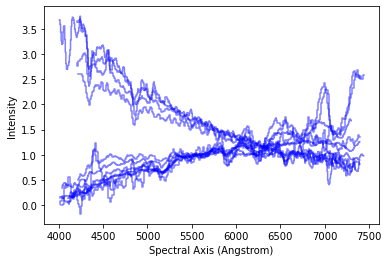

In [5]:
fig, ax = plt.subplots() 
for S in table_sa200[2:]:
    ax.step(S.s1d.spectral_axis, S.s1d.flux, color = 'blue', alpha = 0.5)
    ax.set_xlabel('Spectral Axis ({})'.format(S.s1d.spectral_axis.unit)) 
    ax.set_ylabel('Intensity'.format(S.s1d.flux.unit))

## Instruments et applications
---
La partie spectrographe est faite par l'instrument de droite. Les applications **RSpec** et **Isis** ont été utilisées pour la réalisation de ce document.<br>
![preview](https://github.com/dtouzan/preview/blob/main/HD222685-rspec.png?raw=true)

>**_Fig 3.0._** Profile brut calibré de HD 222685 sur RSpec

![preview](https://github.com/dtouzan/preview/blob/main/HD222685-isis.png?raw=true)

>**_Fig 4.0._** Profile brut non calibré de HD 222685 sur Isis

![preview](https://github.com/dtouzan/preview/blob/main/spectro.png?raw=true)

## Remerciements
---
Remerciements aux auteurs des documentations des logiciels et des sites internet pour faciliter l'utilisations de ceux-ci, ainsi qu'aux nombreuses bases de données publique CDS portal et AAVSO.

## Références
---
<a id='ref1'></a>
[1]. Isis 6.1, http://www.astrosurf.com/buil/isis-software.html<br>
<a id='ref2'></a>
[2]. Siril 1.0.0-rc2, https://siril.org/fr/<br>
<a id='ref3'></a>
[3]. Aladin Sky Atlas 11.0, https://aladin.u-strasbg.fr/<br>
<a id='ref4'></a>
[4]. RSpec 2.0, https://www.rspec-astro.com/<br>
<a id='ref5'></a>
[5]. AAVSO, https://www.aavso.org/databases<br>
<a id='ref6'></a>
[6]. CDS Portal, http://cdsportal.u-strasbg.fr/<br>
<a id='ref7'></a>
[7]. Dataset, https://drive.google.com/drive/folders/1vB4VsLEAP8Jh2qYspy3vRUTOjJ1kNKfP?usp=sharing

![preview](https://github.com/dtouzan/preview/blob/main/logo.png?raw=true)